## Лабораторная работа 5
## Приближение функций
### Анна Гаврилина
### Вариант 6: 5.1.6, 5.3.3, 5.7.3, 5.9.3

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Задача 5.1.6

##### Задаю векторы x и y исходных данных.

In [12]:
x = np.linspace(0,2,11)
y = np.array([-0.9, -0.6482, -0.2436, -0.1, 0.0231, 0.0260, 0.0967, -0.2203, -0.323, -0.6472, -0.763])

In [27]:
print("X: ", x, len(x))
print("Y: \n", y, len(y))
m = 11
n = len(x)

X:  [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ] 11
Y: 
 [-0.9    -0.6482 -0.2436 -0.1     0.0231  0.026   0.0967 -0.2203 -0.323
 -0.6472 -0.763 ] 11
11


##### Метод наименьших квадратов

In [46]:

def MNK(x, y, m):
    A = np.array([[x_**j for j in range(m+1)] for x_ in x])
    result = np.linalg.solve(A.T.dot(A), A.T.dot(y))

    return result

#коэффиценты многочлена
for i in range(len(x)):
    coef = np.poly1d(MNK(x, y, i))
    print(coef)
    
#значение полинома  вточке
def point(x, coef):
    return np.sum(coef * (x**np.arange(coef.shape[0])))




 
-0.3363
 
-0.3492 x + 0.0129
         2
-0.9011 x + 1.852 x - 0.9198
         3         2
-0.9542 x + 2.274 x - 1.472 x + 0.1842
         4         3          2
-0.9091 x + 1.491 x + 0.4847 x - 1.382 x + 0.3914
         5         4          3           2
-0.9148 x + 1.715 x - 0.4393 x - 0.07995 x - 0.3537 x + 0.149
         6          5         4         3         2
-0.9057 x + 0.7972 x + 5.192 x - 12.19 x + 11.35 x - 5.055 x + 0.8673
         7          6         5         4        3         2
-0.9018 x - 0.4896 x + 15.92 x - 44.21 x + 56.8 x - 38.26 x + 12.93 x - 1.723
         8         7         6         5         4         3       2
-0.8995 x - 4.017 x + 52.58 x - 185.2 x + 325.8 x - 320.2 x + 178 x - 52.32 x + 6.325
         9         8         7         6         5        4        3
-0.9002 x + 4.299 x - 48.13 x + 283.4 x - 799.2 x + 1234 x - 1106 x
          2
 + 573.4 x - 159.5 x + 18.43
      10         9         8        7        6             5
-0.9 x  - 40.29 x + 553.5 

зависимости σ_m от m

In [81]:
sigmas = []
for m in range(11):
    coef = MNK (x, y, m)
    y_prev = np.array([point(x_, coef) for x_ in x])
    sigma = np.sqrt(np.sum((y_prev-y)**2) / (y.shape[0] - m))
    sigmas.append(sigma)

Text(0, 0.5, 'sigma')

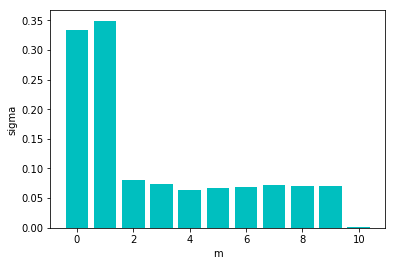

In [82]:
plt.bar(np.arange(11),sigmas,color='c')
plt.xlabel('m')
plt.ylabel('sigma')

In [83]:
m_star = np.argmin(sigmas)
m_star

10

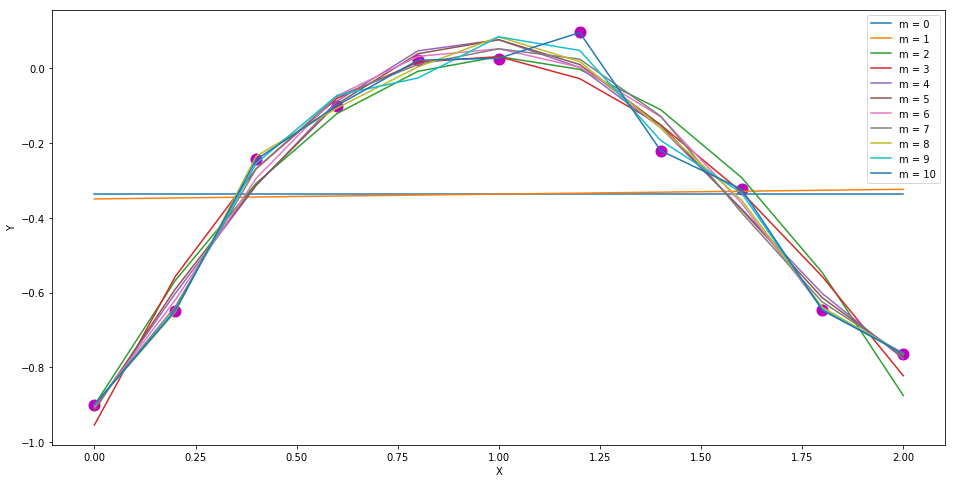

In [84]:
plt.figure(figsize = (16, 8))
plt.scatter(x, y,color='m',linewidths=6)


for m in range(m_star+1):
    coef = MNK(x,y,m)
    y_ = np.array([point(x_,coef) for x_ in x])
    plt.plot(x, y_, label='m = '+str(m))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

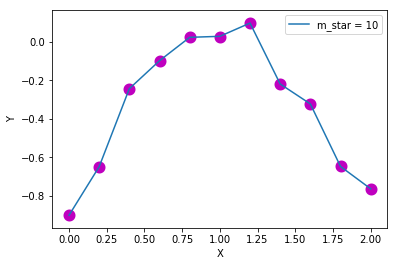

In [91]:
plt.scatter(x, y,color='m',linewidths=6)

coef = MNK(x,y,m_star)
y_ = np.array([point(x_,coef) for x_ in x])
plt.plot(x, y_, label='m_star = '+str(m_star))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

### Задача 5.3.3

Зависимость между величинами x и y описывается функцией y=f(x, a, b), где a и b – неизвестные параметры. Найти эти параметры, сведя исходную задачу к линейной задаче метода наименьших квадратов. УКАЗАНИЕ. Свести исходную задачу к линейной задаче МНК можно, сделав подходящую замену переменных.
Например, если исходная зависимость имеет вид y = ea+bx2 , то прологарифмировав исходное равенство и введя новые переменные s = ln y и t = x2 , получаем задачу об определении коэффициентов линейной
зависимости s= a+b t.


Задаю значения x,y

In [96]:
x = np.linspace(0.1, 1.1, 11)
y = np.array([0.479, 0.7562, 0.9184, 1.03335, 1.1227, 1.1957, 1.2573, 1.3107, 1.3579, 1.4, 1.4381])

Привожу к линейному виду: a+b*ln(x) => a+b*t

In [97]:
t = np.log(x)

In [98]:
coef = MNK(t,y,1)

In [104]:
a = np.round(coef[0], 5)
b = np.round(coef[1], 5)
print(a,"+",b,"ln(x)")

1.39998 + 0.4 ln(x)


Text(0, 0.5, 'y')

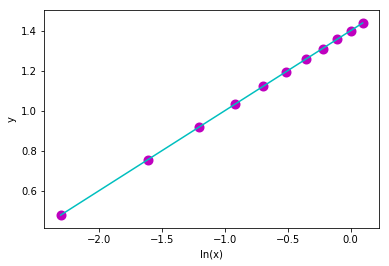

In [110]:
plt.scatter(t, y,color='m',linewidths=4)
plt.plot(t,a + b * t,c = 'c')
plt.xlabel('ln(x)')
plt.ylabel('y')

## Задача 5.7.3

Дана кусочно-гладкая функция y=f(x). Сравнить качество приближения функции кусочно-линейной и глобальной интерполяциями.

Моя функция

In [125]:
def f(x):
    return 1 / (1 + 2 * np.abs(x))

Задаю отрезок для интерполяции

In [134]:
k = 30
x = np.linspace(-2,2,k)

Вычислить значения функции yi = f (xi ) в произвольных точках xi , i=0,1,..., k-1, отрезка [a, b], по которым будет осуществляться интерполяция функции.

In [127]:
y = np.array([f(x_) for x_ in x])

Составить программу-функцию, вычисляющую значение интерполяционного многочлена 1-ой степени по
точкам (xi,yi)и (xi+1,yi+1)впроизвольнойточкеотрезка [xi,xi+1].Сеепомощьювычислить
приближенные значения функции f(x) при кусочно-линейной интерполяции в 3k точках исходного отрезка [a,b].

In [128]:
def lin_inter(x, x0, x1):
    y0 = f(x0)
    y1 = f(x1)
    return(y0 - (y1 - y0) / (x1 - x0) * x0 +  (y1 - y0) / (x1 - x0) * x)

In [220]:
n = 3*k + 1
x_slice = np.linspace(-2, 2, n)
x_slice.shape

(91,)

Генерирую 3k точек

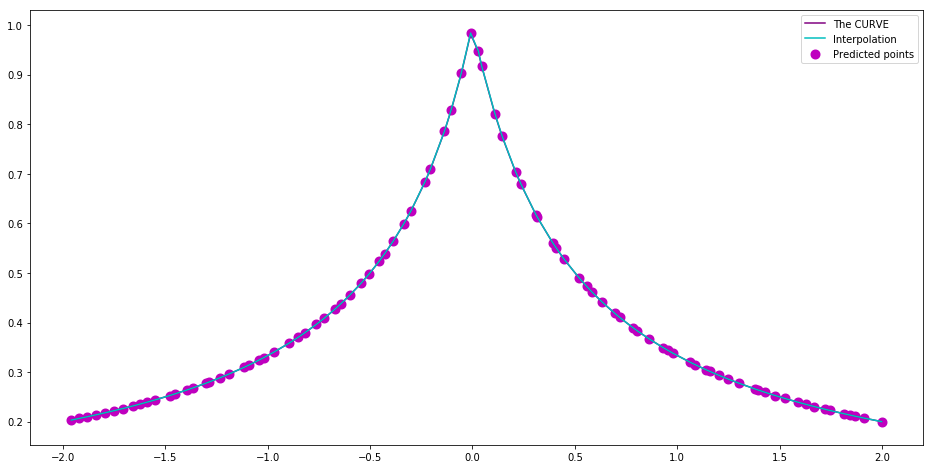

In [221]:
import random
X_ = []
error1 = []
Y_ = []
for i in range(n-1):
    x_ = random.uniform(x_slice[i], x_slice[i+1])
    X_.append(x_)
    Y_.append(lin_inter(x_, x_slice[i], x_slice[i+1]))
    y_prediction = lin_inter(x_, x_slice[i], x_slice[i+1])
    error1.append (np.abs(y_prediction - f(x_)))
Y = np.array([f(x_) for x_ in X_])   
plt.figure(figsize = (16, 8))
plt.scatter(X_, Y_, color='m', label='Predicted points',linewidths=4)
plt.plot(X_,Y, label='The CURVE', c='purple')
plt.plot(X_,Y_, label = 'Interpolation', c='c')
plt.legend()



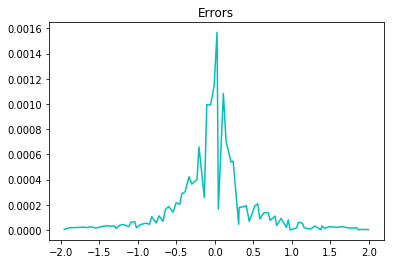

In [223]:
plt.plot(X_,error1, c='c')
plt.title("Errors");

In [226]:
n = 16
x_slice = np.linspace(-2, 2, n)
x_slice.shape

(16,)

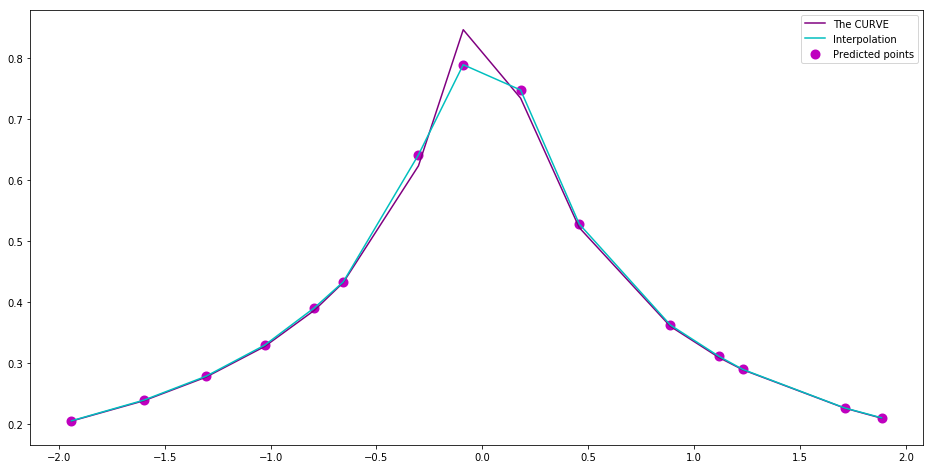

In [228]:
import random
X_ = []
error2 = []
Y_ = []
for i in range(n-1):
    x_ = random.uniform(x_slice[i], x_slice[i+1])
    X_.append(x_)
    Y_.append(lin_inter(x_, x_slice[i], x_slice[i+1]))
    y_prediction = lin_inter(x_, x_slice[i], x_slice[i+1])
    error2.append (np.abs(y_prediction - f(x_)))
Y = np.array([f(x_) for x_ in X_])   
plt.figure(figsize = (16, 8))
plt.scatter(X_, Y_, color='m', label='Predicted points',linewidths=4)
plt.plot(X_,Y, label='The CURVE', c='purple')
plt.plot(X_,Y_, label = 'Interpolation', c='c')
plt.legend()

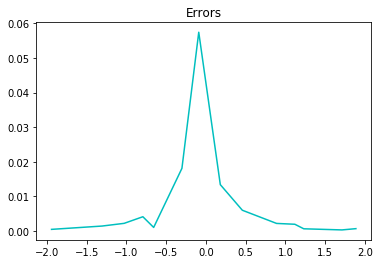

In [230]:
plt.plot(X_,error2, c='c')
plt.title("Errors");